# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#CONCAT units and api key to url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
CityData = []
RecordCount = 1
SetCount = 1
print("Beginning Data Retrieval")
print("-----------------------------")
# loop through all the cities in the list
for i,city in enumerate(cities):
    # group cities in sets of 50
    if (i%50==0 and i>=50):
        SetCount +=1
        RecordCount = 0
    CityUrl = url + "&q=" + city
    # log the url record and set numbers
    print(f"Processing Record {RecordCount} of Set {SetCount} | {city}")
    # formatting
    # increment record count by 1
    RecordCount +=1
    # run API calls
    try:
        CityWeather = requests.get(CityUrl).json()
        # variable is going to have coordinates and data to select out
        # temp, humidity, cloudiness

        Lat = CityWeather["coord"]["lat"]
        Lng = CityWeather["coord"]["lon"]
        MaxTemp = CityWeather["main"]["temp_max"]
        Humidity = CityWeather["main"]["humidity"]
        Cloudiness = CityWeather["clouds"]["all"]
        Windiness = CityWeather["wind"]["speed"]
        Country = CityWeather["sys"]["country"]
        

        #append the city information into city_data list
        CityData.append({"City": city,
                         "Lat": Lat,
                         "Lon":Lng,
                         "Max Temp":MaxTemp,
                         "Humidity":Humidity,
                         "Cloudiness":Cloudiness,
                         "Wind Speed":Windiness,
                         "Country":Country})

    #if error, skip city
    except KeyError:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | villa maria
Processing Record 2 of Set 1 | dourbali
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | promissao
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | benguela
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | ca mau
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | niquero
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | rumonge
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 

Processing Record 34 of Set 4 | chifeng
Processing Record 35 of Set 4 | kathu
Processing Record 36 of Set 4 | labuhan
Processing Record 37 of Set 4 | vostok
Processing Record 38 of Set 4 | magna
Processing Record 39 of Set 4 | gornozavodsk
Processing Record 40 of Set 4 | peniche
Processing Record 41 of Set 4 | usak
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | tuburan
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | chicama
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | nurota
Processing Record 0 of Set 5 | bonavista
Processing Record 1 of Set 5 | russell
Processing Record 2 of Set 5 | flin flon
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | khomeyn
Processing Record 5 of Set 5 | karangasem
Processing Record 6 of Set 5 | el alto
Processing Record 7 of Set 5 | sultanpur
Processing Record 8 of Set 5 | mega
Processing

Processing Record 22 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 23 of Set 8 | tornio
Processing Record 24 of Set 8 | krishnarajpet
Processing Record 25 of Set 8 | mandalgovi
Processing Record 26 of Set 8 | kangaatsiaq
Processing Record 27 of Set 8 | general pico
Processing Record 28 of Set 8 | georgetown
Processing Record 29 of Set 8 | vila franca do campo
Processing Record 30 of Set 8 | ayan
Processing Record 31 of Set 8 | rio grande
Processing Record 32 of Set 8 | kushima
Processing Record 33 of Set 8 | mahe
Processing Record 34 of Set 8 | dvinskoy
Processing Record 35 of Set 8 | vanimo
Processing Record 36 of Set 8 | muravlenko
Processing Record 37 of Set 8 | solnechnyy
Processing Record 38 of Set 8 | saint-francois
Processing Record 39 of Set 8 | kingston upon hull
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | san
Processing Record 42 of Set 8 | makakilo city
Processing Record 43 of Set 8 | manavalakurichi
Processing Record 44 of Se

Processing Record 4 of Set 12 | chacabuco
Processing Record 5 of Set 12 | karlstad
Processing Record 6 of Set 12 | goiatuba
Processing Record 7 of Set 12 | kirkenaer
Processing Record 8 of Set 12 | prince rupert
Processing Record 9 of Set 12 | mitu
Processing Record 10 of Set 12 | cap malheureux
Processing Record 11 of Set 12 | jalapa
Processing Record 12 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 13 of Set 12 | middlebury
Processing Record 14 of Set 12 | nha trang
Processing Record 15 of Set 12 | matagami
Processing Record 16 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 17 of Set 12 | sakata
Processing Record 18 of Set 12 | huron
Processing Record 19 of Set 12 | paita
Processing Record 20 of Set 12 | brae
Processing Record 21 of Set 12 | babanusah
City not found. Skipping...
Processing Record 22 of Set 12 | okhotsk
Processing Record 23 of Set 12 | geraldton
Processing Record 24 of Set 12 | mackenzie
Processing Record 25 of Set 12 | omboue

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
DisplayCityData = pd.DataFrame(CityData)
DisplayCityData.to_csv(output_data_file, index=False)
DisplayCityData.count()

City          547
Lat           547
Lon           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
dtype: int64

In [5]:
DisplayCityData.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,villa maria,-32.41,-63.24,46.00,44,0,4.00,AR
1,dourbali,11.81,15.86,73.15,92,99,6.78,TD
2,katsuura,35.13,140.30,97.00,66,20,8.05,JP
3,promissao,-21.54,-49.86,72.32,45,27,5.32,BR
4,bredasdorp,-34.53,20.04,46.40,87,0,9.17,ZA


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
DisplayCityData.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,20.033985,18.457989,67.787770,71.817185,46.435101,6.974442
std,33.994434,90.633428,14.138327,18.968536,38.990476,4.628854
min,-54.800000,-179.170000,28.400000,3.000000,0.000000,0.380000
25%,-9.040000,-63.115000,56.110000,61.000000,1.000000,3.360000
50%,24.470000,21.290000,69.330000,75.000000,40.000000,5.820000
75%,50.505000,100.345000,79.475000,86.000000,88.500000,9.375000
max,78.220000,179.320000,105.800000,100.000000,100.000000,26.690000


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

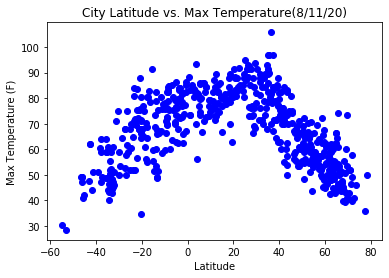

<Figure size 432x288 with 0 Axes>

In [25]:
Latitude = DisplayCityData["Lat"]
Temperature = DisplayCityData["Max Temp"]
plt.title("City Latitude vs. Max Temperature(8/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(Latitude, Temperature, marker="o", color="blue")
plt.show()
plt.savefig('output_data/Temperature.png')
# This plot shows that as you reach the equator, it does get hotter.

## Latitude vs. Humidity Plot

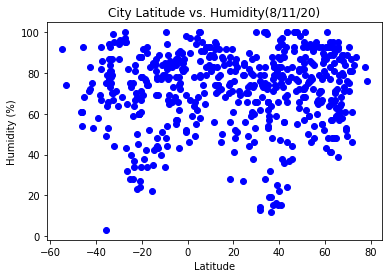

<Figure size 432x288 with 0 Axes>

In [26]:
Latitude = DisplayCityData["Lat"]
Humidity = DisplayCityData["Humidity"]
plt.title("City Latitude vs. Humidity(8/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(Latitude, Humidity, marker="o", color="blue")
plt.show()
plt.savefig('output_data/Humidity.png')
# There seems to be no correlation between latitude and humidity

## Latitude vs. Cloudiness Plot

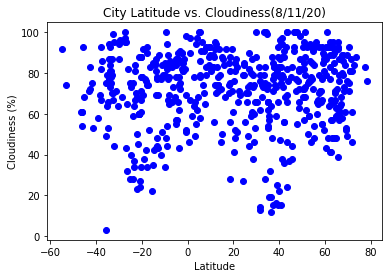

<Figure size 432x288 with 0 Axes>

In [27]:
Latitude = DisplayCityData["Lat"]
Cloudiness = DisplayCityData["Cloudiness"]
plt.title("City Latitude vs. Cloudiness(8/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(Latitude, Humidity, marker="o", color="blue")
plt.show()
plt.savefig('output_data/Cloudiness.png')
# # There seems to be no correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

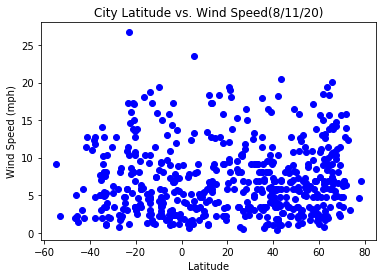

<Figure size 432x288 with 0 Axes>

In [13]:
Latitude = DisplayCityData["Lat"]
WindSpeed = DisplayCityData["Wind Speed"]
plt.title("City Latitude vs. Wind Speed(8/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(Latitude, WindSpeed, marker="o", color="blue")
plt.show()
plt.savefig('output_data/WindSpeed.png')
# There seems to be no correlation between latitude and wind speed

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create new column: Northern or Southern
DisplayCityData["Hemisphere"] = np.where(DisplayCityData["Lat"]>=0, "Northern", "Southern")
# Create Northern and Southern Hemisphere DataFrames
HemisphereGroups = DisplayCityData.groupby(DisplayCityData.Hemisphere)
NorthernDF = HemisphereGroups.get_group("Northern")
SouthernDF = HemisphereGroups.get_group("Southern")
SouthernDF

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Hemisphere
0,villa maria,-32.41,-63.24,46.00,44,0,4.00,AR,Southern
3,promissao,-21.54,-49.86,72.32,45,27,5.32,BR,Southern
4,bredasdorp,-34.53,20.04,46.40,87,0,9.17,ZA,Southern
5,benguela,-12.58,13.41,66.38,89,0,1.30,AO,Southern
6,puerto ayora,-0.74,-90.35,66.99,98,97,1.99,EC,Southern
...,...,...,...,...,...,...,...,...,...
539,sao joao batista,-27.28,-48.85,68.00,97,95,0.72,BR,Southern
540,demba,-5.51,22.27,69.76,67,74,2.35,CD,Southern
543,huambo,-12.78,15.74,51.39,43,0,1.66,AO,Southern
545,noumea,-22.28,166.46,75.20,50,8,16.11,NC,Southern


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5907243938523761


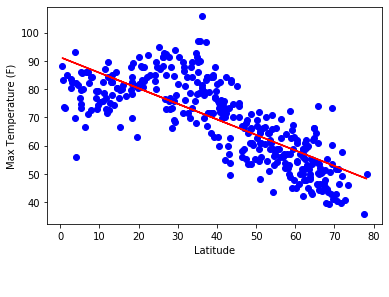

In [16]:
Latitude = NorthernDF["Lat"]
Temperature = NorthernDF["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude,Temperature)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Temperature, marker="o", color="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5095926794491368


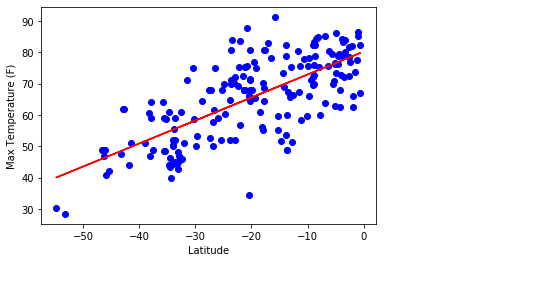

In [17]:
Latitude = SouthernDF["Lat"]
Temperature = SouthernDF["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude,Temperature)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Temperature, marker="o", color="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 3.3075801088246795e-05


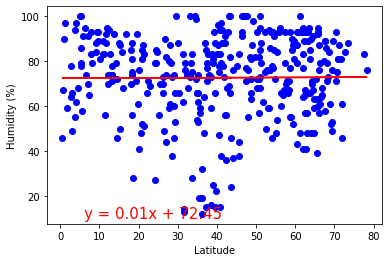

In [18]:
Latitude = NorthernDF["Lat"]
Humidity = NorthernDF["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude,Humidity)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", color="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0011494621216512257


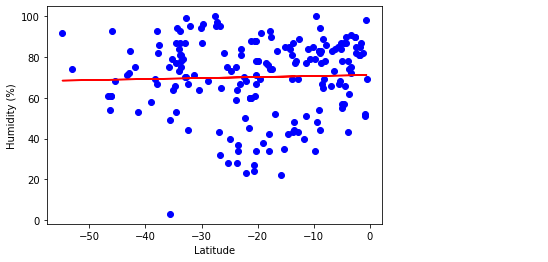

In [19]:
Latitude = SouthernDF["Lat"]
Humidity = SouthernDF["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude,Humidity)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", color="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008357833462854649


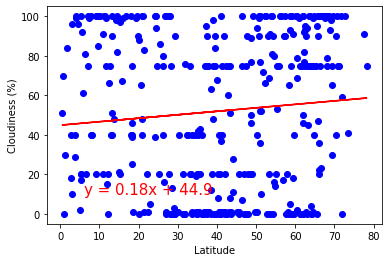

In [20]:
Latitude = NorthernDF["Lat"]
Cloudiness = NorthernDF["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude,Cloudiness)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", color="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.047055357986185285


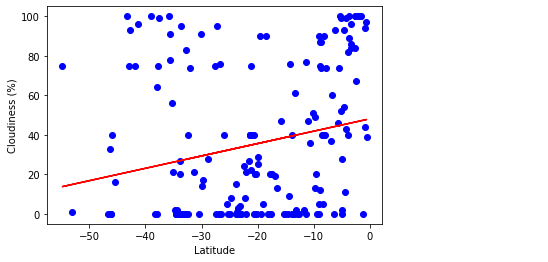

In [21]:
Latitude = SouthernDF["Lat"]
Cloudiness = SouthernDF["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude,Cloudiness)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", color="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007264841846018817


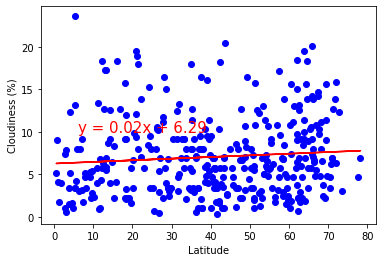

In [22]:
Latitude = NorthernDF["Lat"]
WindSpeed = NorthernDF["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude,WindSpeed)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, WindSpeed, marker="o", color="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0005729835182178511


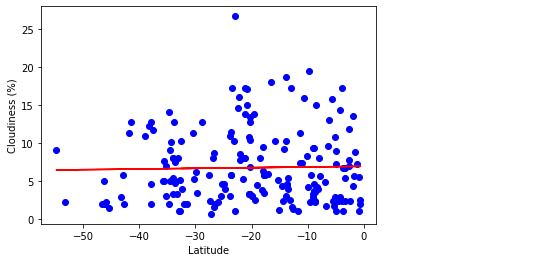

In [23]:
Latitude = SouthernDF["Lat"]
WindSpeed = SouthernDF["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude,WindSpeed)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, WindSpeed, marker="o", color="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()